In [79]:
import tensorflow as tf

height, width = int(1080 * .5), int(1920 * .5)
train_ds = tf.keras.utils.image_dataset_from_directory('datasets', color_mode='grayscale', image_size=(height, width))

Found 573 files belonging to 2 classes.


In [80]:
class_names = train_ds.class_names
class_names

['defeat', 'victory']

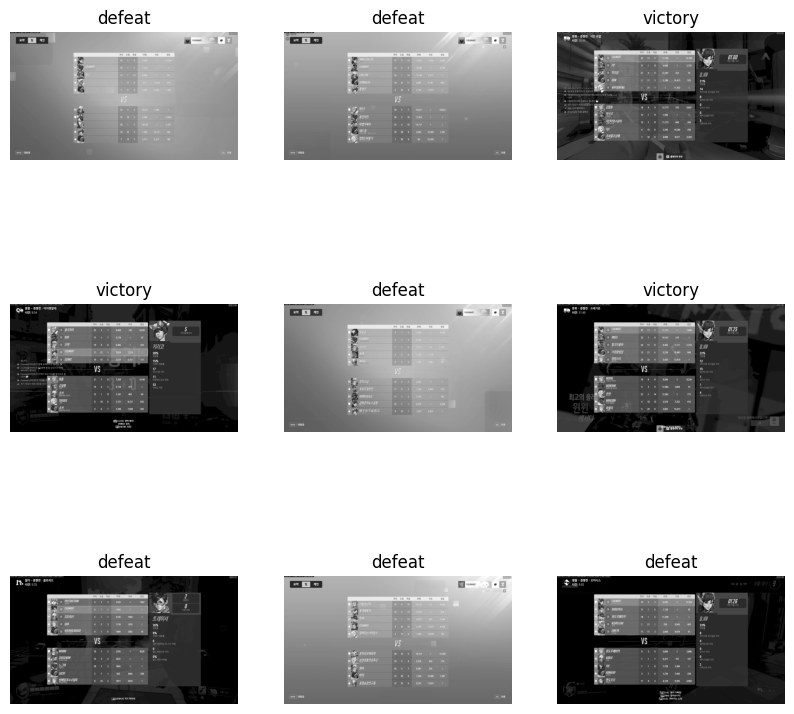

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'), 'gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')

(-0.5, 549.5, 389.5, -0.5)

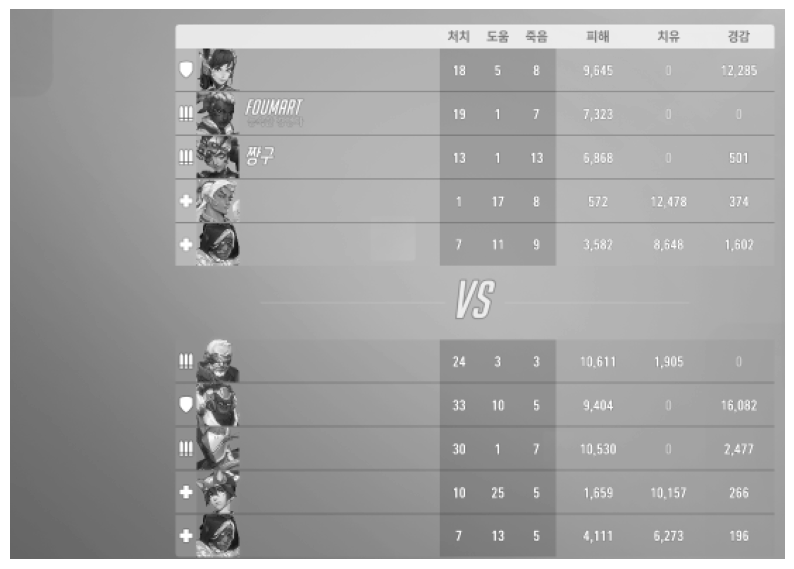

In [83]:
top_crop, bottom_crop, left_crop, right_crop = 80, 70, 150, 260
cropped = tf.keras.layers.Cropping2D(((top_crop, bottom_crop), (left_crop, right_crop)))(images)
plt.figure(figsize=(10, 10))
plt.imshow(cropped[0].numpy().astype('uint8'), 'gray')
plt.axis('off')

In [84]:
import tensorflow as tf

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.Input((height, width, 1)))
model.add(tf.keras.layers.Cropping2D(((top_crop, bottom_crop), (left_crop, right_crop))))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, 'relu'))
model.add(tf.keras.layers.Dense(100, 'relu'))
model.add(tf.keras.layers.Dense(60))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cropping2d (Cropping2D)     (None, 390, 550, 1)       0         
                                                                 
 flatten (Flatten)           (None, 214500)            0         
                                                                 
 dense (Dense)               (None, 300)               64350300  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 60)                6060      
                                                                 
Total params: 64386460 (245.61 MB)
Trainable params: 64386460 (245.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
